# CLV Prediction for Car Insurance Company
by Qemhal Haritskhayru 

---

Dataset used in this machine learning model -> [Dataset Source](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ)

### Contents
1. Business Background
2. Data Cleaning and Understanding
3. Data Analysis
4. Modeling for Prediction
5. Saving the model
6. Explainable AI
7. Conclusion and Recommendation

> ### 1. Business Background

**1.1 Background**

Acquiring a new customer can often be significantly more expensive than retaining an existing one. This is due to the various costs associated with attracting and converting potential customers, such as marketing campaigns, advertising, sales efforts, and onboarding processes. In contrast, retaining existing customers often involves less intensive and costly efforts, focusing on building relationships, providing excellent customer service, and offering loyalty programs or personalized experiences.

This difference in cost is a key factor in the concept of Customer Lifetime Value (CLV). Customer Lifetime Value (CLV) is the amount of money a customer is predicted to spend with a company over the duration of their relationship with that company. More than just an exchange of services for money, CLV is a measurement of how valuable a customer is to the company over time. Understanding and predicting CLV allows businesses to make informed decisions about marketing investments, customer relationship management, cost saving and increasing profit.

For Purwadhika Auto Insurance, accurately predicting Customer Lifetime Value (CLV) is crucial for prioritizing customer retention over costly new customer acquisition. By identifying customers with relatively low to medium CLV, the company can focus its resources on targeted retention strategies. This approach recognizes that nurturing existing relationships often proves more cost-effective than attracting new clients. Through CLV prediction, Purwadhika can personalize offers and services for these specific segments, enhancing customer satisfaction and loyalty. Furthermore, CLV insights enable tailored pricing strategies, balancing profitability with retention by adjusting premiums based on individual customer value within these segments. Additionally, this approach provides a proactive alert system, identifying customers with low to medium CLV who may be at risk of churning, empowering Purwadhika to intervene early and maintain these valuable accounts.

Determining CLV involves several key steps and calculations. At its core, CLV is the product of a customer's average purchase value, the average purchase frequency, and the average customer lifespan. The basic formula for calculating CLV is:

$$ \text{CLV} = (\text{Average Purchase Value}) \times (\text{Average Purchase Frequency}) \times (\text{Average Customer Lifespan}) $$

**1.2 Business Problem**

Purwadhika Auto Insurance faces the challenge of balancing customer acquisition with customer retention amidst a competitive market landscape. While acquiring new customers remains important, the company recognizes the value of retaining existing customers, particularly those with relatively low to medium Customer Lifetime Value (CLV). Traditional customer segmentation and pricing models have not effectively differentiated between these segments, leading to inefficiencies in resource allocation and potential churn among valuable customers. High acquisition costs and price-sensitive consumers further exacerbate the need for a refined approach to customer management. Purwadhika aims to leverage data-driven insights to better understand and predict CLV, enabling them to tailor retention strategies and personalized offerings that foster long-term customer loyalty and profitability within this crucial segment.

**1.3 Goal of the Machine Learning Model in Predicting CLV**

The goal of employing a machine learning model to predict Customer Lifetime Value at Purwadhika Auto Insurance is threefold:

1. Identification of Retention Opportunities: Accurately predicting CLV enables Purwadhika to identify customers with the potential for long-term value, even if their initial CLV is low or medium. This allows the company to focus resources on nurturing these relationships, fostering loyalty, and increasing their lifetime value.

2. Personalized Retention Strategies: By understanding the characteristics and behaviors of customers within the low to medium CLV segments, Purwadhika can create targeted retention initiatives. This might include personalized offers, enhanced communication, and proactive outreach to address potential concerns and prevent customers from churning.

3. Optimized Pricing for Retention:  CLV prediction allows for more nuanced pricing strategies within these segments. Purwadhika can adjust premiums to strike a balance between profitability and customer retention, offering competitive rates that incentivize customers to remain with the company.

**1.4 Stakeholders**

The primary stakeholders for this project are the Head of the Marketing Department at Purwadhika Auto Insurance. They are responsible for making strategic decisions about marketing investments, customer relationship management, and overall business strategy. By leveraging insights from the CLV predictions, they can better allocate resources, tailor marketing campaigns, and implement effective customer retention programs.

By leveraging machine learning to predict CLV, Purwadhika Auto Insurance can transform their approach to customer management, driving higher profitability, and ensuring long-term customer satisfaction.

**1.5 Analytical Approach**

Since we want to predict a continous value (Customer Lifetime Value) so we use a supervised machine learning regression method. The phases of creating the prediction model is; First do some data understanding (cleaning), second do a preprocessing and feature engineering, define some regression learning method (ex linear regression, Knn regression, Gradient boosting, etc), choose the best model in predicting and then try to improve it with hyperparameter tuning.

**1.6 Metric Evaluation**

- RMSE
- RMSPE
- Adjusted R2

In [628]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from statsmodels.tools.eval_measures import rmse

import pickle
import warnings
warnings.filterwarnings('ignore')

> ### 2. Data Understanding

In [629]:
df = pd.read_csv("data_customer_lifetime_value.csv")
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


| Column Name                        | Explanation                                                                                                                                                                |
| ----------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Vehicle Class                       | The type of vehicle insured                                                                                                                 |
| Coverage                           | The level of insurance coverage selected by the customer                                                                                     |
| Renew Offer Type                    | The type of offer made to the customer for policy renewal                                                                         |
| EmploymentStatus                    | The employment status of the customer                                                                                            |
| Marital Status                      | The marital status of the customer                                                                                                        |
| Education                          | The highest level of education attained by the customer                                                                            |
| Number of Policies                  | The total number of insurance policies held by the customer across all types of insurance                                                                                 |
| Monthly Premium Auto               | The monthly premium paid by the customer for their auto insurance policy                                                                                                  |
| Total Claim Amount                  | The total amount of money the customer has claimed from the insurance company for auto-related incidents                                                                    |
| Income                             | The annual income of the customer                                                                                                                                         |
| Customer Lifetime Value (Target) | The predicted total value a customer will bring to the company over their entire relationship. |



We have 11 columns in total, ten of its is the feature and 1 is the target (customer lifetime value). There are six categorical features and four numerical features.

> ### 3. Exploratory Data Analysis

In [631]:
# Converitng column names into snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_class            5669 non-null   object 
 1   coverage                 5669 non-null   object 
 2   renew_offer_type         5669 non-null   object 
 3   employmentstatus         5669 non-null   object 
 4   marital_status           5669 non-null   object 
 5   education                5669 non-null   object 
 6   number_of_policies       5669 non-null   float64
 7   monthly_premium_auto     5669 non-null   float64
 8   total_claim_amount       5669 non-null   float64
 9   income                   5669 non-null   float64
 10  customer_lifetime_value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [633]:
df.columns

Index(['vehicle_class', 'coverage', 'renew_offer_type', 'employmentstatus',
       'marital_status', 'education', 'number_of_policies',
       'monthly_premium_auto', 'total_claim_amount', 'income',
       'customer_lifetime_value'],
      dtype='object')

In [634]:
# check data nullity, unique value
pd.set_option('display.max_colwidth', None)

pd.DataFrame({
    'feature':df.columns.values,
    'data_type':df.dtypes.values,
    'null':df.isna().mean().values * 100,
    'negative':[True if df[i].dtype == int and (df[i] < 0).any() else False for i in df.columns],
    'n_unique':df.nunique().values,
    'sample_unique':[df[i].unique()[:10] for i in df.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,vehicle_class,object,0.0,False,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,coverage,object,0.0,False,3,"[Extended, Basic, Premium]"
2,renew_offer_type,object,0.0,False,4,"[Offer1, Offer3, Offer2, Offer4]"
3,employmentstatus,object,0.0,False,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,marital_status,object,0.0,False,3,"[Divorced, Married, Single]"
5,education,object,0.0,False,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,number_of_policies,float64,0.0,False,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,monthly_premium_auto,float64,0.0,False,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0]"
8,total_claim_amount,float64,0.0,False,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896]"
9,income,float64,0.0,False,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0]"


In [635]:
df.isna().sum()

vehicle_class              0
coverage                   0
renew_offer_type           0
employmentstatus           0
marital_status             0
education                  0
number_of_policies         0
monthly_premium_auto       0
total_claim_amount         0
income                     0
customer_lifetime_value    0
dtype: int64

<Axes: >

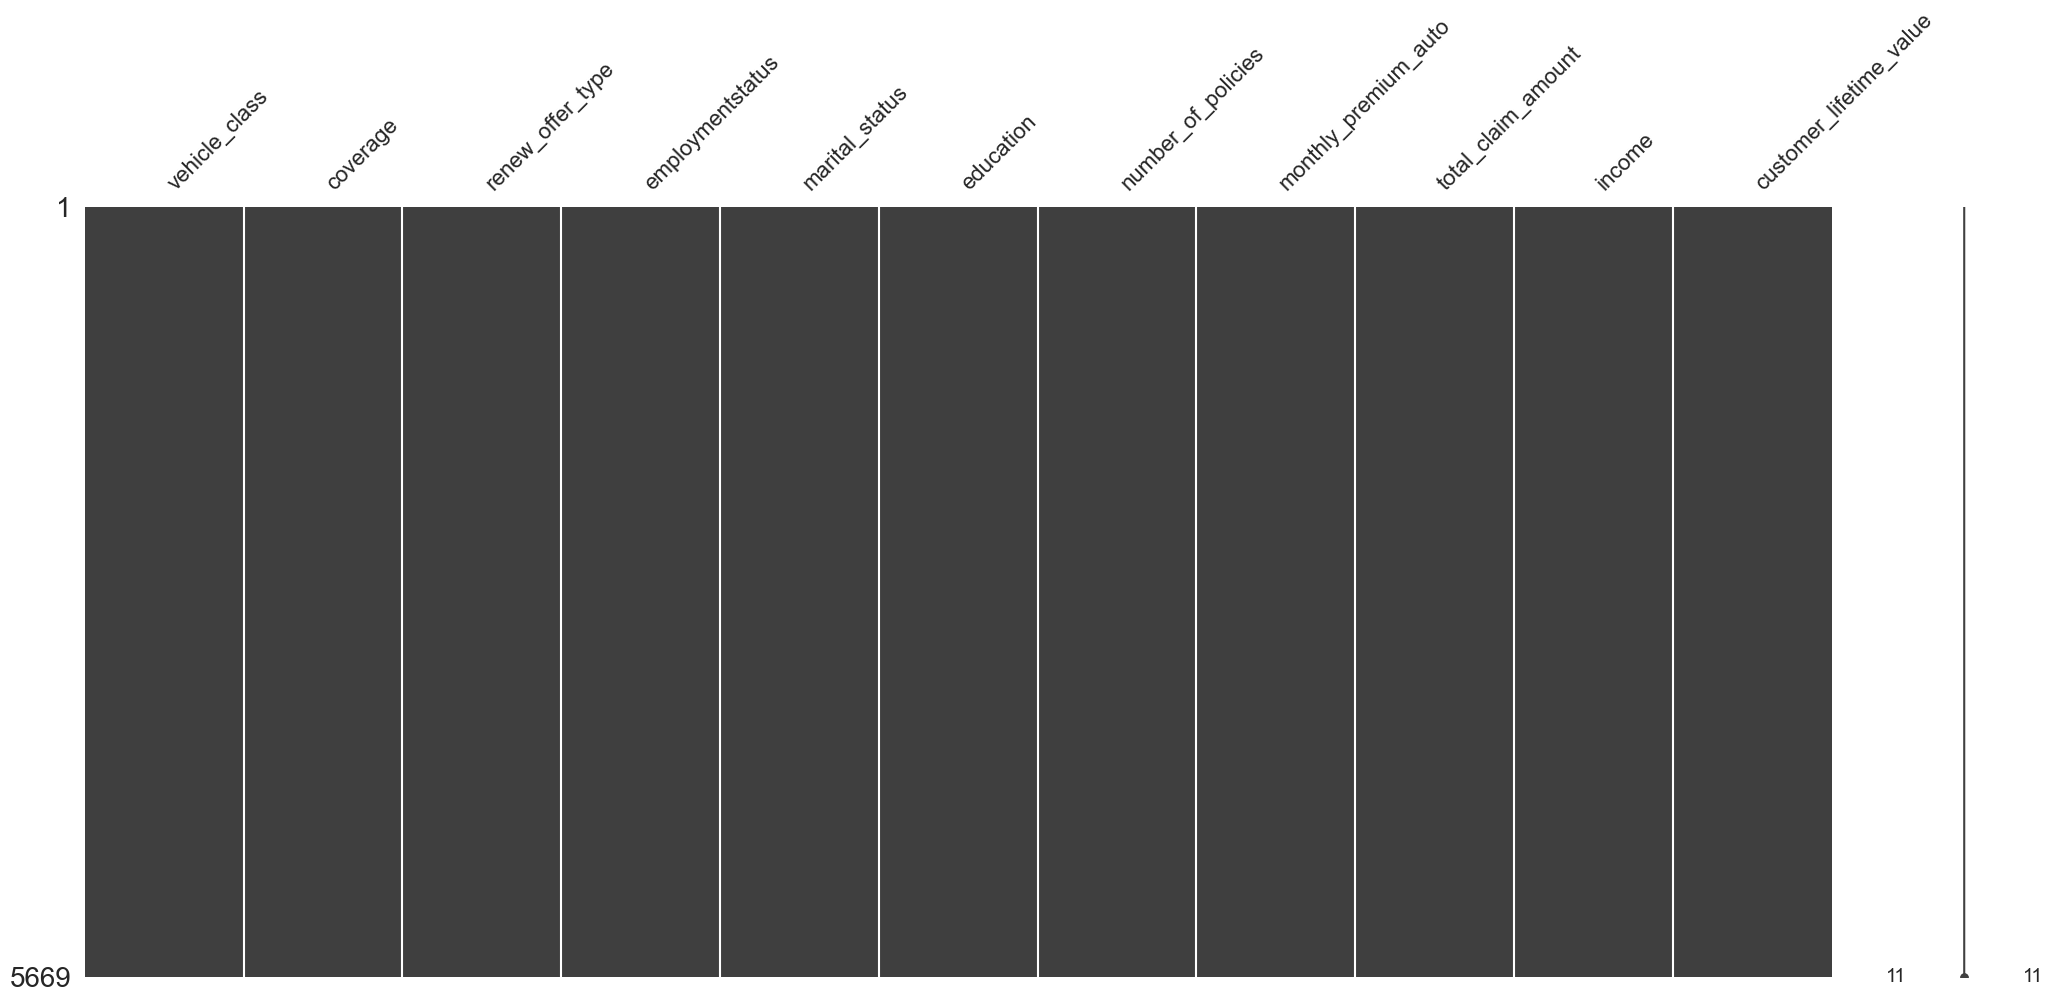

In [636]:
msn.matrix(df)

In [637]:
df.duplicated(subset="customer_lifetime_value", keep = "first").sum()

620

In [638]:
duplicated_data = df[df.duplicated(subset="customer_lifetime_value", keep = "first")]
duplicated_data


,vehicle_class,coverage,renew_offer_type,employmentstatus,marital_status,education,number_of_policies,monthly_premium_auto,total_claim_amount,income,customer_lifetime_value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


In [639]:
df = df.drop_duplicates(subset='customer_lifetime_value', keep='first')

In [640]:
# After removing duplicates
df.shape

(5049, 11)

In [641]:
# Function to check outliers
def calculate_outliers(data, column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_column = ['number_of_policies', 'monthly_premium_auto', 'total_claim_amount', 'income', 'customer_lifetime_value']

In [642]:
outlier_data = []

for i in numerical_column:
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i])*100, 2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["column", "total_outlier", "percentage", "lower_bound", "upper_bound"])
outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,number_of_policies,228,4.52,-3.500000,8.500000
1,monthly_premium_auto,251,4.97,6.500000,170.500000
2,total_claim_amount,216,4.28,-192.477016,992.146331
3,income,0,0.00,-93709.500000,156182.500000
4,customer_lifetime_value,449,8.89,-3630.634930,16623.673537


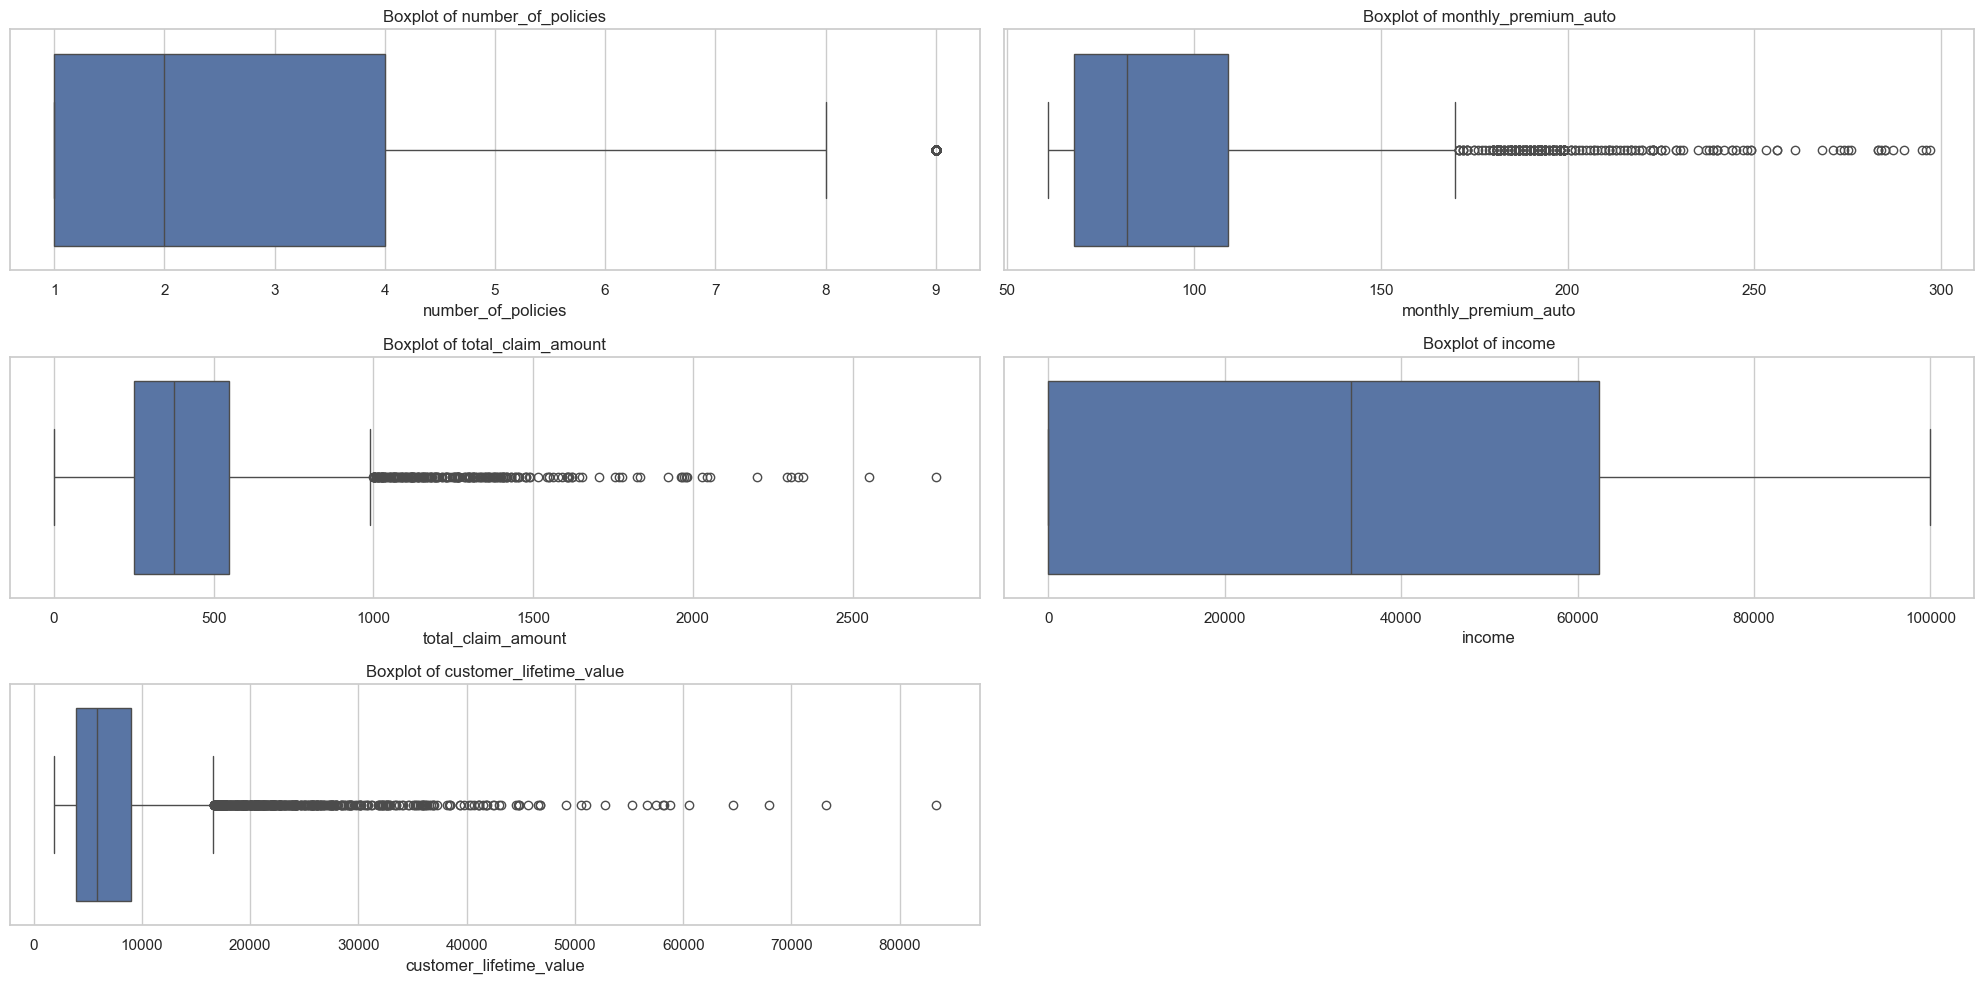

In [643]:
plt.figure(figsize=(20, 10))

# Loop through the columns and create a subplot for each
for i, column in enumerate(numerical_column, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

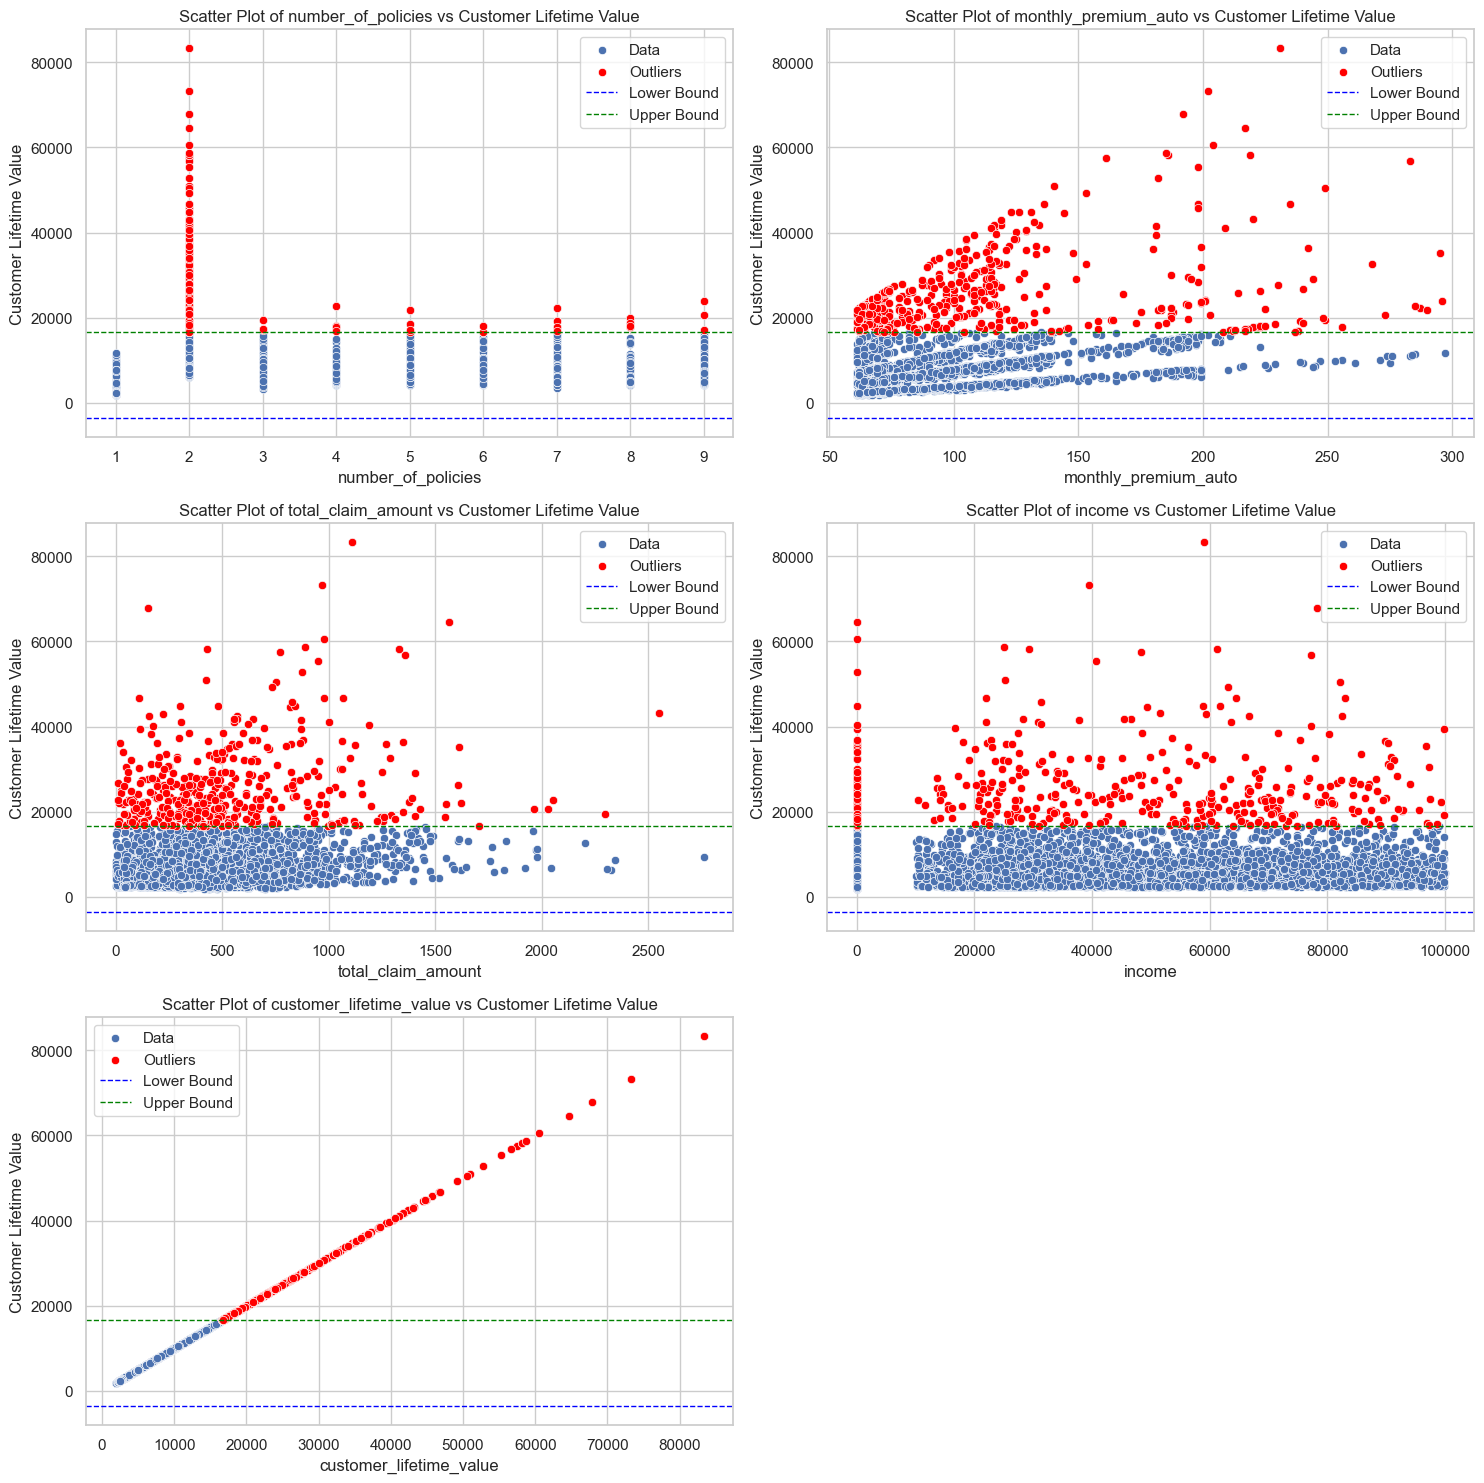

In [644]:
# Determine the grid size for subplots
num_cols = 2
num_rows = int(np.ceil(len(numerical_column) / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_column):
    row, col_pos = divmod(i, num_cols)
    
    # Identify outliers
    outliers, lower_bound, upper_bound = calculate_outliers(df, "customer_lifetime_value")
    
    # Plot all data points
    sns.scatterplot(data=df, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], label='Data')
    
    # Highlight outliers
    sns.scatterplot(data=outliers, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], color='red', label='Outliers')
    
    # Add a horizontal line for lower and upper bounds
    axs[row, col_pos].axhline(lower_bound, color='blue', linestyle='dashed', linewidth=1, label='Lower Bound')
    axs[row, col_pos].axhline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound')
    
    # Add labels and title
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel("Customer Lifetime Value")
    axs[row, col_pos].set_title(f"Scatter Plot of {col} vs Customer Lifetime Value")
    axs[row, col_pos].legend()

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

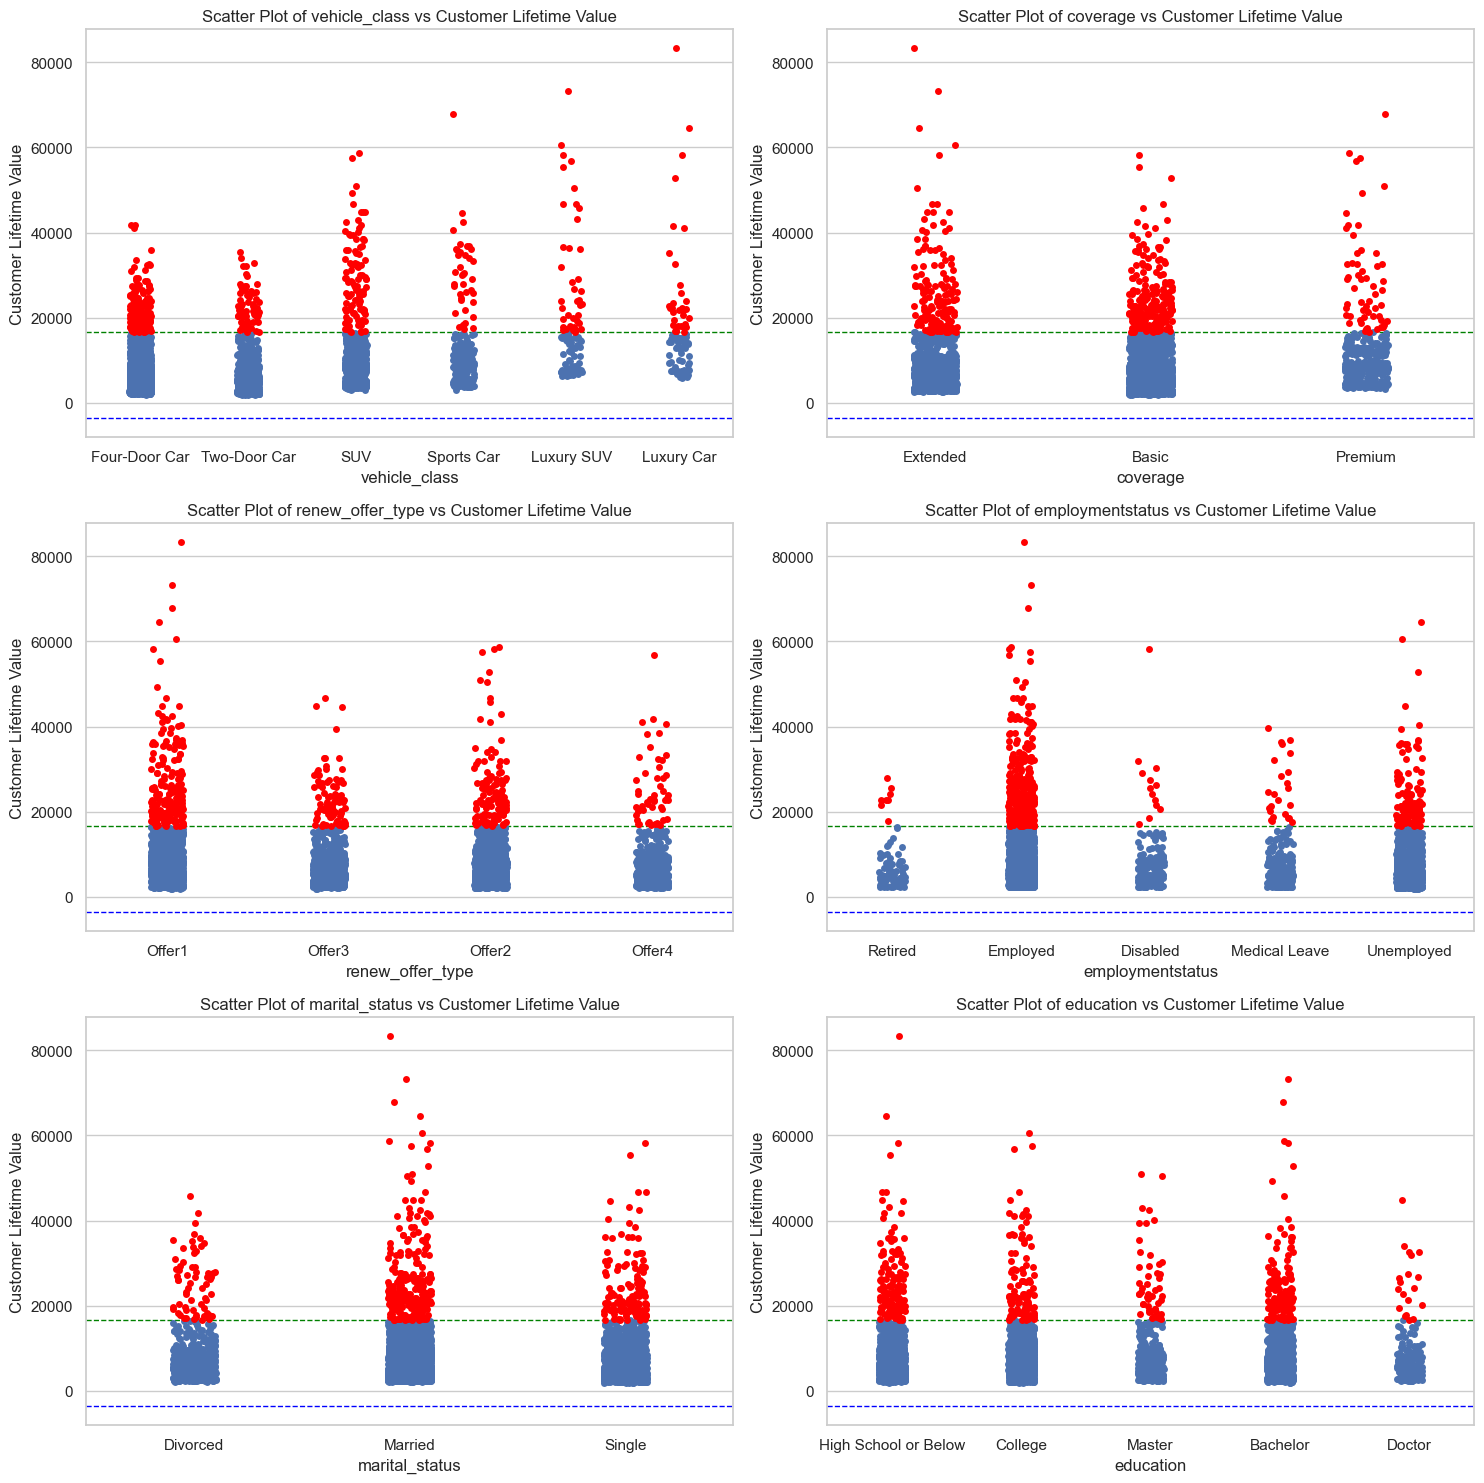

In [645]:
categorical_columns = [
    "vehicle_class",            
    "coverage",                
    "renew_offer_type",         
    "employmentstatus",         
    "marital_status",            
    "education"
]

# Determine the grid size for subplots
num_cols = 2
num_rows = int(np.ceil(len(categorical_columns) / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_columns):
    row, col_pos = divmod(i, num_cols)
    
    # Identify outliers
    outliers, lower_bound, upper_bound = calculate_outliers(df, "customer_lifetime_value")
    
    # Filter out outliers from the main dataframe
    non_outliers = df[(df["customer_lifetime_value"] >= lower_bound) & (df["customer_lifetime_value"] <= upper_bound)]
    
    # Plot non-outliers
    sns.stripplot(data=non_outliers, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], jitter=True)
    
    # Highlight outliers
    sns.stripplot(data=outliers, x=col, y="customer_lifetime_value", ax=axs[row, col_pos], color='red', jitter=True)
    
    # Add a horizontal line for lower and upper bounds
    axs[row, col_pos].axhline(lower_bound, color='blue', linestyle='dashed', linewidth=1)
    axs[row, col_pos].axhline(upper_bound, color='green', linestyle='dashed', linewidth=1)
    
    # Add labels and title
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel("Customer Lifetime Value")
    axs[row, col_pos].set_title(f"Scatter Plot of {col} vs Customer Lifetime Value")

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [646]:
p_95 = np.percentile(df["customer_lifetime_value"],95)
df[df["customer_lifetime_value"] > p_95]["customer_lifetime_value"].count()

253

In [647]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_policies,5049.0,2.992870,2.386643,1.000000,1.000000,2.000000,4.000000,9.000000
monthly_premium_auto,5049.0,92.884135,34.262906,61.000000,68.000000,82.000000,109.000000,297.000000
total_claim_amount,5049.0,429.506991,292.411096,0.423310,251.756739,374.400000,547.912576,2759.794354
income,5049.0,37754.787879,30688.335107,0.000000,0.000000,34335.000000,62473.000000,99934.000000
customer_lifetime_value,5049.0,8060.435309,6990.074953,1898.007675,3964.730745,5837.528088,9028.307862,83325.381190


In [648]:
correlation_matrix = df[numerical_column].corr()

# Filter for correlations with "customer_lifetime_value"
correlation_with_clv = correlation_matrix[['customer_lifetime_value']]

correlation_with_clv.sort_values(by="customer_lifetime_value", ascending=False)

,customer_lifetime_value
customer_lifetime_value,1.000000
monthly_premium_auto,0.417810
total_claim_amount,0.212340
income,0.036844
number_of_policies,0.022034


In [649]:
df.describe(include="object").T

,count,unique,top,freq
vehicle_class,5049,6,Four-Door Car,2565
coverage,5049,3,Basic,3099
renew_offer_type,5049,4,Offer1,2019
employmentstatus,5049,5,Employed,3187
marital_status,5049,3,Married,2986
education,5049,5,Bachelor,1529


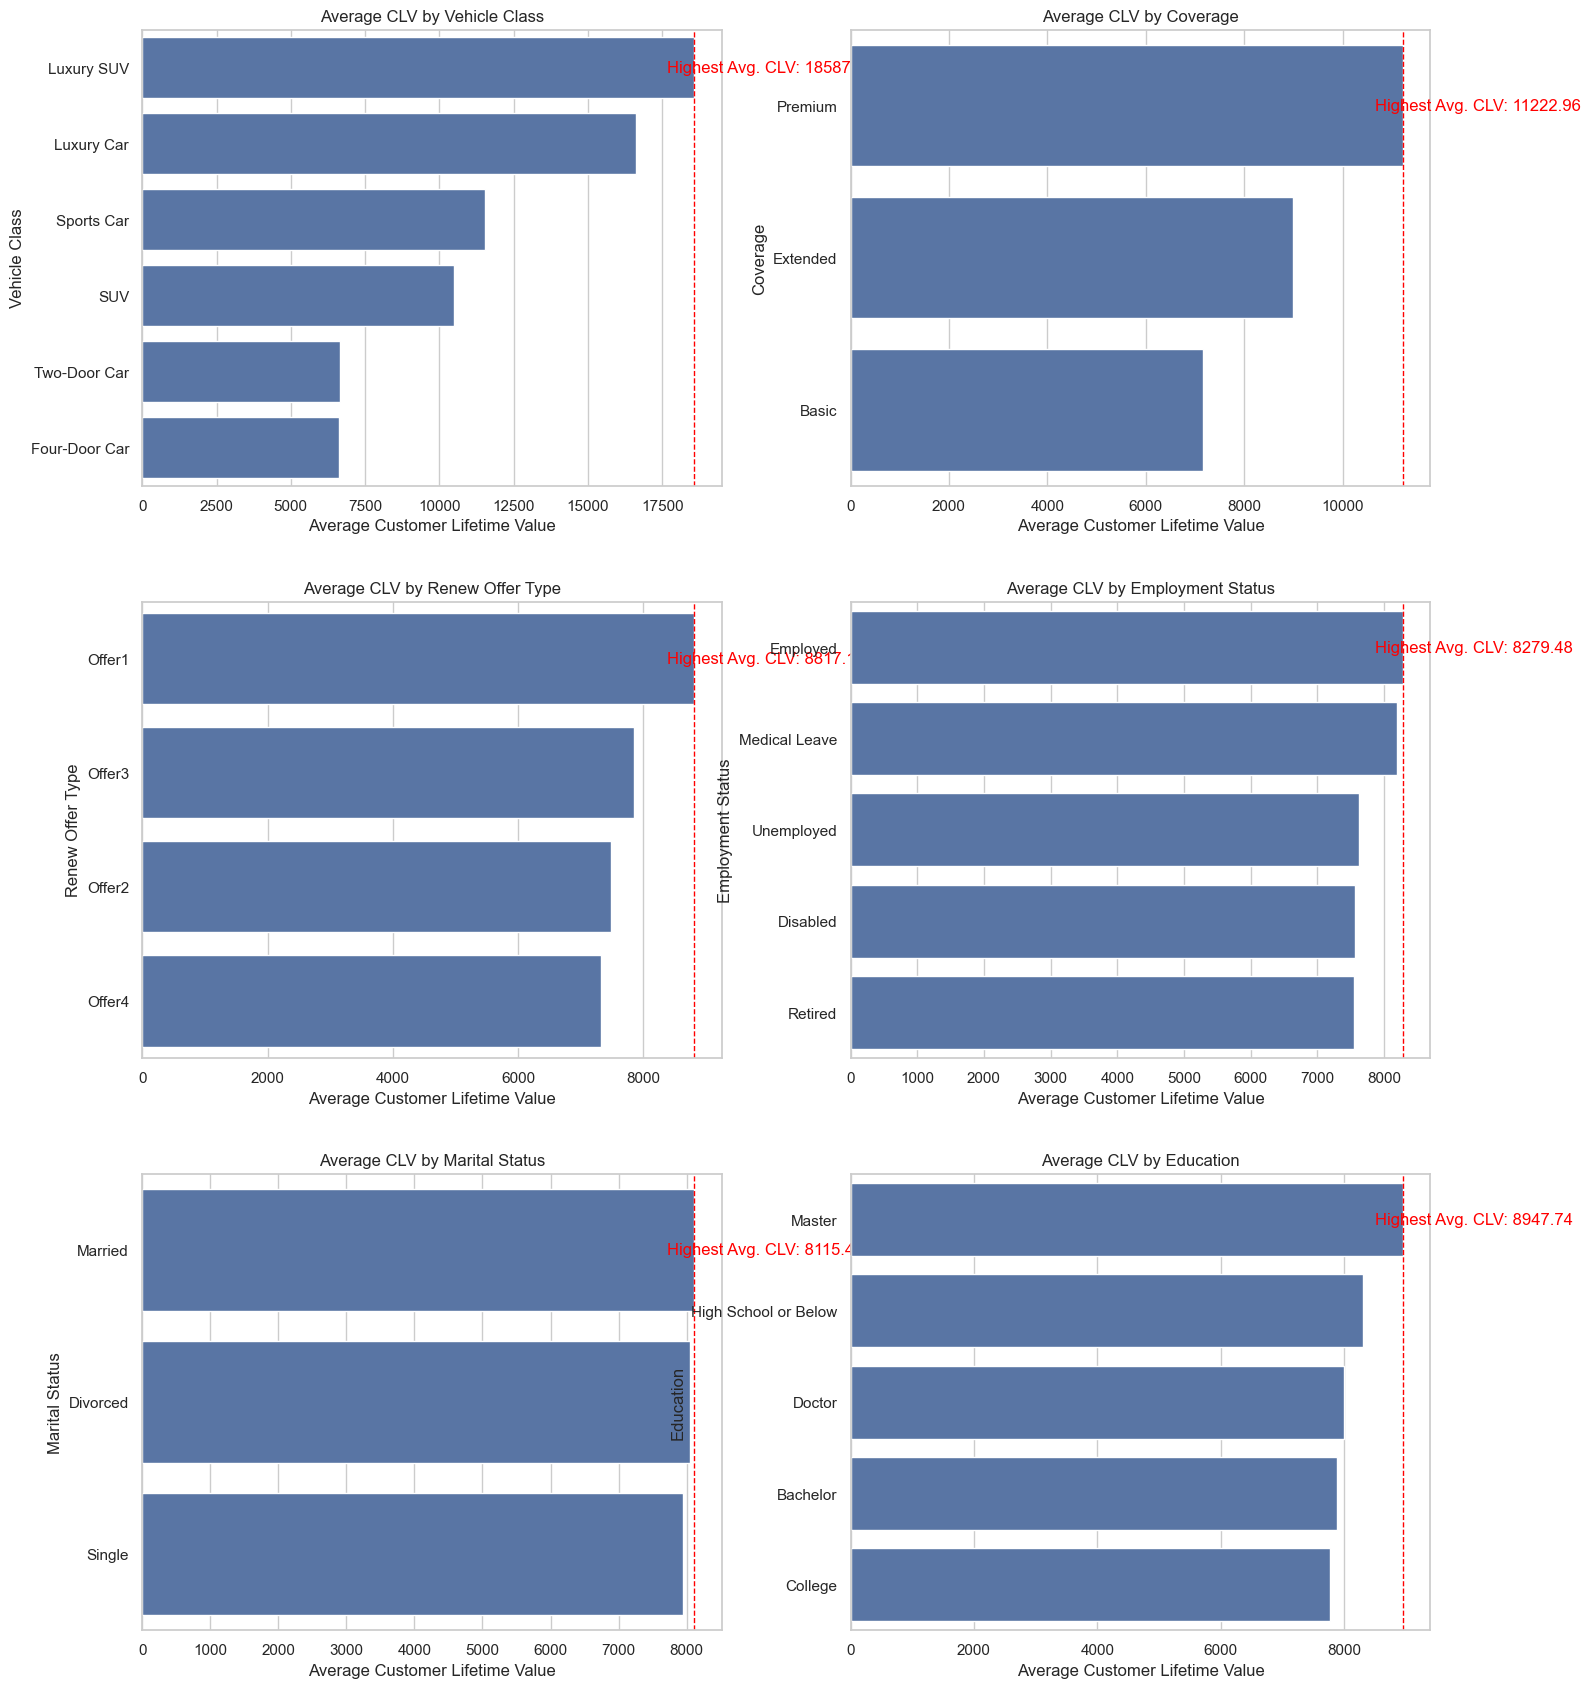

In [650]:
fig, axs = plt.subplots(3, 2, figsize=(15, 18))
fig.tight_layout(pad=5.0)

# List of categories to plot
categories = [
    ("vehicle_class", "Vehicle Class"),
    ("coverage", "Coverage"),
    ("renew_offer_type", "Renew Offer Type"),
    ("employmentstatus", "Employment Status"),
    ("marital_status", "Marital Status"),
    ("education", "Education")
]

for i, (col, title) in enumerate(categories):
    row, col_pos = divmod(i, 2)
    
    # Calculate mean CLV per category
    mean_df = df.groupby(col)["customer_lifetime_value"].mean().reset_index().sort_values(by="customer_lifetime_value", ascending=False)
    highest_avg_clv = mean_df["customer_lifetime_value"].max()

    # Create the horizontal bar plot with mean values
    sns.barplot(data=mean_df, x="customer_lifetime_value", y=col, ax=axs[row, col_pos])

    # Add the horizontal line
    axs[row, col_pos].axvline(highest_avg_clv, color='red', linestyle='dashed', linewidth=1)

    # Add a text label to the line
    axs[row, col_pos].text(highest_avg_clv * 0.95, 0, f'Highest Avg. CLV: {highest_avg_clv:.2f}', color='red', va='center')

    # Add labels and title
    axs[row, col_pos].set_ylabel(title)
    axs[row, col_pos].set_xlabel("Average Customer Lifetime Value")
    axs[row, col_pos].set_title(f"Average CLV by {title}")

# Show the plot
plt.show()

Insights from Exploratory Data Analysis :

1. Numerical features that has the highest correlation with customer lifetime value is monthly premium auto with the correlation value of 0.478534, which is not a very strong positive correlation.
2. Numerical features that has the lowest correlation with customer lifetime value is income with the correaltion value of 0.044536.
3. Cutomers with the vehicle class "Luxury Car" has the highest average customer lifetime value of 11012.37, followed by "Luxury SUV"
4. Customers with premium coverage has the highest average customer lifetime value of 8436.33, followed by extended coverage.
5. Customers that receive offer1 from renew offer type has the highest average customer lifetime value of 6846.52.
6. Employed customers has the highest average customer lifetime value of 6460.72, even though there are not a big differences with the other employment status.
7. Customers that are married has the highest average customer lifetime value of 6409.79, even though there are not a big differences between the marital status.
8. Customers that has a master's degree has the highest average customer lifetime value of 6502.92, even though there are not a big differences with the other level of education amongs customers.

Outliers decision :

The scatterplot analysis reveals a concentration of customers with exceptionally high Customer Lifetime Value (CLV), primarily those holding two Purwadhika Auto Insurance policies. While these high-CLV customers present an opportunity for further analysis to understand the drivers of their value, our current focus is on developing a machine learning model to effectively identify and retain customers with low to medium CLV. To optimize the model's performance on this specific target group, we will temporarily exclude customers exceeding the 95th percentile of CLV. This strategic exclusion will enable us to refine the model while preserving the valuable data associated with our high-value customers for future investigation.


> ### 4. Model Experiment

**4.1 Preprocessing and Feature Engineering**

In [651]:
# Removing outliers that are above 95 percentile
df = df[df["customer_lifetime_value"] <= p_95].copy()
df

,vehicle_class,coverage,renew_offer_type,employmentstatus,marital_status,education,number_of_policies,monthly_premium_auto,total_claim_amount,income,customer_lifetime_value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134


In [652]:
# Assigning column for ordinal encoding
vehicle_class_categories = ['Two-Door Car', 'Four-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car']
coverage_categories = ['Basic', 'Extended', 'Premium']
renew_offer_type_categories = ['Offer1', 'Offer2', 'Offer3', 'Offer4']
education_categories = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

In [653]:
# Data spliting between features and target
X = df.drop('customer_lifetime_value', axis=1)
y = df["customer_lifetime_value"]

# split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 14
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3836, 10), (960, 10), (3836,), (960,))

In [654]:
# Transformer for OLS, Linear, Ridge, Lasso, and KNN
transformer_1 = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first"), ["employmentstatus", "marital_status"]),
    ('ordinal', OrdinalEncoder(categories=[vehicle_class_categories, coverage_categories, renew_offer_type_categories, education_categories]), ['vehicle_class', 'coverage', 'renew_offer_type', 'education']),
    ("scaler", MinMaxScaler(), ["monthly_premium_auto", "total_claim_amount", "income"])
], remainder="passthrough")

# Transformer for Tree based model
transformer_2 = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first"), ["employmentstatus", "marital_status"]),
    ('ordinal', OrdinalEncoder(categories=[vehicle_class_categories, coverage_categories, renew_offer_type_categories, education_categories]), ['vehicle_class', 'coverage', 'renew_offer_type', 'education'])
], remainder="passthrough")

In [655]:
# Reset indices to ensure alignment
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [656]:
transformer_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['employmentstatus', 'marital_status']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Two-Door Car',
                                                             'Four-Door Car',
                                                             'SUV',
                                                             'Sports Car',
                                                             'Luxury SUV',
                                                             'Luxury Car'],
                                                            ['Basic',
                                                             'Extended',
                                                             'Premium'],
                                                            ['Offer1', 'Offer2',
                                                             'Offer3',
                                                             'Offer4'],
                                                            ['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor']]),
                                 ['vehicle_class', 'coverage',
                                  'renew_offer_type', 'education']),
                                ('scaler', MinMaxScaler(),
                                 ['monthly_premium_auto', 'total_claim_amount',
                                  'income'])])

In [657]:
# Data Transformation
X_train_preprocess = transformer_1.fit_transform(X_train)
X_test_preprocess = transformer_1.transform(X_test)

In [658]:
X_train_preprocess = pd.DataFrame(X_train_preprocess)
X_test_preprocess = pd.DataFrame(X_test_preprocess)

In [659]:
# Getting the column name back
transformer_1.transformers_

[('onehot',
  OneHotEncoder(drop='first'),
  ['employmentstatus', 'marital_status']),
 ('ordinal',
  OrdinalEncoder(categories=[['Two-Door Car', 'Four-Door Car', 'SUV',
                              'Sports Car', 'Luxury SUV', 'Luxury Car'],
                             ['Basic', 'Extended', 'Premium'],
                             ['Offer1', 'Offer2', 'Offer3', 'Offer4'],
                             ['High School or Below', 'College', 'Bachelor',
                              'Master', 'Doctor']]),
  ['vehicle_class', 'coverage', 'renew_offer_type', 'education']),
 ('scaler',
  MinMaxScaler(),
  ['monthly_premium_auto', 'total_claim_amount', 'income']),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [6])]

In [660]:
feature_names = transformer_1.transformers_[0][1].get_feature_names_out()
feature_names

array(['employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed',
       'marital_status_Married', 'marital_status_Single'], dtype=object)

In [661]:
feature_names_2 = transformer_1.transformers_[1][1].get_feature_names_out()
feature_names_2

array(['vehicle_class', 'coverage', 'renew_offer_type', 'education'],
      dtype=object)

In [662]:
features = list(feature_names) + list(feature_names_2) + ["number_of_policies", "monthly_premium_auto", "total_claim_amount", "income"]
X_train_preprocess.columns = features
X_test_preprocess.columns = features
display(X_train_preprocess, X_test_preprocess)

,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,marital_status_Married,marital_status_Single,vehicle_class,coverage,renew_offer_type,education,number_of_policies,monthly_premium_auto,total_claim_amount,income
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.008475,0.031230,0.674155,3.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,0.000000,0.049239,0.704585,3.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.046610,0.125093,0.000000,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.004237,0.030251,0.629415,2.0
4,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,2.0,0.326271,0.339965,0.214642,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,0.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.580508,0.571598,0.000000,1.0
3832,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.016949,0.169450,0.000000,1.0
3833,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.042373,0.185106,0.000000,1.0
3834,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.029661,0.249643,0.000000,7.0


,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,marital_status_Married,marital_status_Single,vehicle_class,coverage,renew_offer_type,education,number_of_policies,monthly_premium_auto,total_claim_amount,income
0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.483051,0.301753,0.904027,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.067797,0.100561,0.395081,5.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.161017,0.172060,0.000000,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.101695,0.022418,0.397803,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.105932,0.062511,0.998819,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.072034,0.135530,0.785839,3.0
956,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.029661,0.093017,0.576250,7.0
957,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.055085,0.128572,0.199622,3.0
958,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.025424,0.019644,0.326485,2.0


**4.2 Ordinary Least Square**

In [663]:
ols = sm.OLS(y_train, sm.add_constant(X_train_preprocess))
results = ols.fit()

In [664]:
# summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.197
Model:                                 OLS   Adj. R-squared:                  0.194
Method:                      Least Squares   F-statistic:                     66.98
Date:                     Tue, 16 Jul 2024   Prob (F-statistic):          3.26e-170
Time:                             04:16:13   Log-Likelihood:                -36959.
No. Observations:                     3836   AIC:                         7.395e+04
Df Residuals:                         3821   BIC:                         7.404e+04
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [665]:
y_pred = results.predict(sm.add_constant(X_test_preprocess))

In [667]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
percentage_errors = (y_test - y_pred) / y_test
rmspe = np.sqrt(np.mean(np.square(percentage_errors))) * 100
Adjusted_R2 = results.rsquared_adj

In [668]:
print("\nMetrics Evaluation OLS:")
print(f"RMSE: {rmse}")
print(f"RMSPE: {rmspe}")
print(f"Adjusted R2: {Adjusted_R2}")


Metrics Evaluation OLS:
RMSE: 3683.5018201697126
RMSPE: 58.92981762882378
Adjusted R2: 0.1941088744708792


**OLS Summary**

1. Dependent Variable: customer_lifetime_value
2. R-squared: 0.197

This indicates that approximately 19.7% of the variance in customer lifetime value is explained by the model.

3. Adjusted R-squared: 0.194

This value adjusts the R-squared for the number of predictors in the model. It's slightly lower than the R-squared, which suggests that adding more predictors does not significantly improve the model.

4. F-statistic: 66.98, with a p-value of 3.26e-170

This indicates that the overall model is statistically significant and that at least one of the predictors is significantly related to the dependent variable.

**Coefficients and Statistical Significance**

1. Intercept (const): 4450.7130


    This is the expected customer lifetime value when all predictors are zero. It is statistically significant (p < 0.001).

2. Employment Status:

- Employed: 416.9305 (p = 0.190) – Not significant.
- Medical Leave: 550.9718 (p = 0.162) – Not significant.
- Retired: -508.2306 (p = 0.387) – Not significant.
- Unemployed: 338.5153 (p = 0.290) – Not significant.

3. Marital Status:

- Married: -9.7140 (p = 0.957) – Not significant.
- Single: 50.2492 (p = 0.812) – Not significant.

4. Vehicle Class: 111.9422 (p = 0.356) – Not significant.

5. Coverage: 228.5817 (p = 0.081) – Marginally significant.

6. Renew Offer Type: -204.1694 (p = 0.001) – Significant.

    **This suggests that a certain type of renewal offer is associated with a decrease in customer lifetime value.**

7. Education: -8.6288 (p = 0.879) – Not significant.

8. Number of Policies: 1.221e+04 (p < 0.001) – Highly significant.

    **This suggests that having more policies is strongly associated with higher customer lifetime value.**

9. Monthly Premium Auto: -2028.1517 (p = 0.017) – Significant.

    **This suggests that higher monthly premiums are associated with a decrease in customer lifetime value.**

10. Total Claim Amount: 146.9359 (p = 0.669) – Not significant.
11. Income: 231.8909 (p < 0.001) – Highly significant.
    
    **Higher income is associated with higher customer lifetime value.**

**4.3 Finding the best model | Linear Model**

In [669]:
# Model
linreg = LinearRegression()
ridge = Ridge(alpha=0.001)
lasso = Lasso(alpha=0.001)
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
gboost = GradientBoostingRegressor(random_state=0)
xgboost = XGBRegressor()

In [670]:
# Define RMSPE scorer
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

In [671]:
# Linear Model Benchmark
# Train the data

models = [linreg, ridge, lasso]
model_name = []
rmse_mean = []
rmse_std = []
rmspe_mean = []
rmspe_std = []

poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
poly_features = ["monthly_premium_auto", "total_claim_amount", "income"]
other_features = [col for col in X_train_preprocess.columns if col not in poly_features] 

for model in models:

    preprocessor = ColumnTransformer(
        transformers=[
            ("poly", poly, poly_features),
            ("passthrough", "passthrough", other_features)
        ]
    )
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),  
        ("modeling", model)
    ])

    kfold = KFold(n_splits=10)

    # RMSE Cross-validation
    rmse_cv = cross_val_score(
        model_pipeline,
        X_train_preprocess,
        y_train,
        cv=kfold,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    # RMSPE Cross-validation
    rmspe_cv = cross_val_score(
        model_pipeline,
        X_train_preprocess,
        y_train,
        cv=kfold,
        scoring=rmspe_scorer,
        error_score='raise'
    )

    # Store results
    model_name.append(model.__class__.__name__)
    rmse_mean.append(abs(rmse_cv.mean()))
    rmse_std.append(rmse_cv.std())
    rmspe_mean.append(abs(rmspe_cv.mean()))
    rmspe_std.append(rmspe_cv.std())



In [672]:
train_score = pd.DataFrame({
    'model': model_name,
    'rmse_mean': rmse_mean,
    'rmse_std': rmse_std,
    'rmspe_mean': rmspe_mean,
    'rmspe_std': rmspe_std
}).sort_values(by='rmse_mean', ascending=True)
train_score

,model,rmse_mean,rmse_std,rmspe_mean,rmspe_std
1,Ridge,2946.348920,213.221022,33.282129,0.816412
0,LinearRegression,2946.386049,213.210484,33.282842,0.816717
2,Lasso,2962.306109,225.055590,33.597403,0.736767


In [673]:
test_predict_rmse = []
test_predict_rmspe = []
model_name = []

for model in models:
    preprocessor = ColumnTransformer(
        transformers=[
            ("poly", poly, poly_features),
            ("passthrough", "passthrough", other_features)
        ]
    )
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),  
        ("modeling", model)
    ])

    model_pipeline.fit(X_train_preprocess, y_train)
    y_pred = model_pipeline.predict(X_test_preprocess)

    # Calculate RMSE
    rmse_result = np.sqrt(mean_squared_error(y_test, y_pred))
    test_predict_rmse.append(rmse_result)

    # Calculate RMSPE
    rmspe_result = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
    test_predict_rmspe.append(rmspe_result)

    model_name.append(model.__class__.__name__)

# Create DataFrame for results
benchmark_model_test = pd.DataFrame({
    "model": model_name,
    "rmse_test": test_predict_rmse,
    "rmspe_test": test_predict_rmspe
}).sort_values(by="rmse_test", ascending=True)

benchmark_model_test

,model,rmse_test,rmspe_test
1,Ridge,2885.758335,34.095021
0,LinearRegression,2885.773884,34.095697
2,Lasso,2911.291169,34.572417


In [674]:
benchmark_model = benchmark_model_test.set_index('model').join(train_score.set_index('model'))
if 'std' in benchmark_model.columns:
    benchmark_model.drop('std', axis=1, inplace=True)
benchmark_model['rmse_diff'] = (benchmark_model['rmse_test'] - benchmark_model['rmse_mean']).abs()
benchmark_model['rmspe_diff'] = (benchmark_model['rmspe_test'] - benchmark_model['rmspe_mean']).abs()
benchmark_model = benchmark_model.sort_values(by='rmse_test', ascending=True)
benchmark_model

,rmse_test,rmspe_test,rmse_mean,rmse_std,rmspe_mean,rmspe_std,rmse_diff,rmspe_diff
model,,,,,,,,
Ridge,2885.758335,34.095021,2946.348920,213.221022,33.282129,0.816412,60.590585,0.812892
LinearRegression,2885.773884,34.095697,2946.386049,213.210484,33.282842,0.816717,60.612166,0.812856
Lasso,2911.291169,34.572417,2962.306109,225.055590,33.597403,0.736767,51.014940,0.975014


**Linear Regression Model Summary**

The analysis reveals that the linear regression model's performance in predicting CLV is not good. The RMSPE value of approximately 34% indicates a substantial margin of error, suggesting that the model's predictions deviate significantly from the actual CLV values. This level of error may not be acceptable for practical decision-making, and further model refinement or alternative model will be explored to improve predictive accuracy.

**4.4 Finding the best model | KNN Regression**

In [675]:
k_values = range(1, 30, 2) 
testing_rmse = []
training_rmse = []

best_k = None
best_rmse = float('inf')  

for k in k_values:
    knn_pipeline = Pipeline([
        ("preprocess", transformer_1),
        ("model", KNeighborsRegressor(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)
    y_predict_train = knn_pipeline.predict(X_train)
    training_rmse.append(np.sqrt(mean_squared_error(y_train,y_predict_train)))


    y_pred_test_knn = knn_pipeline.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))
    testing_rmse.append(test_rmse)

    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_k = k

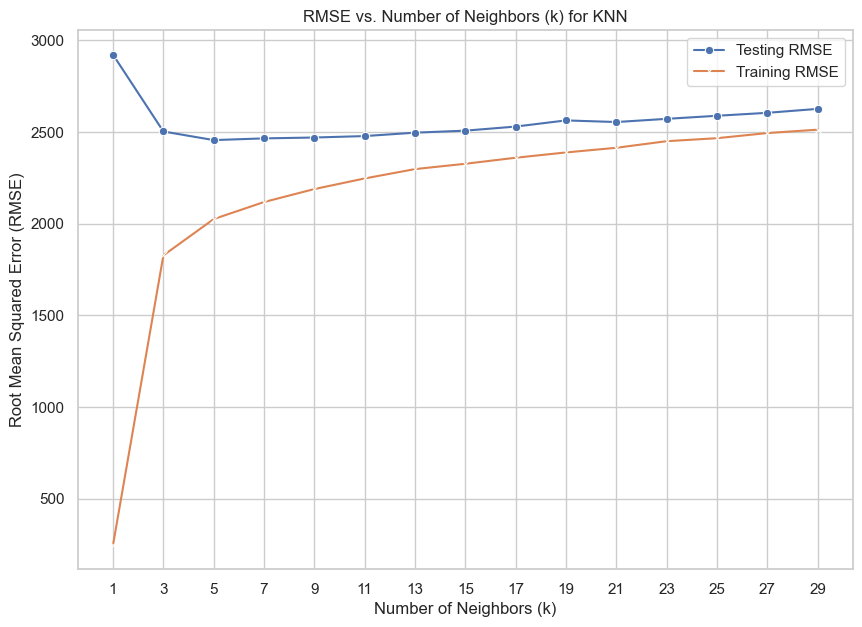

In [676]:
# Create a DataFrame for plotting, using the original k_values
data = pd.DataFrame({'k': k_values, 'Testing RMSE': testing_rmse, 'Training RMSE': training_rmse})

# Create the line plot with a legend
plt.figure(figsize=(10, 7))
sns.lineplot(x='k', y='Testing RMSE', data=data, label='Testing RMSE', marker='o')
sns.lineplot(x='k', y='Training RMSE', data=data, label='Training RMSE', marker='x')

plt.title("RMSE vs. Number of Neighbors (k) for KNN")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(k_values)
plt.legend()
plt.show()


In [677]:
mse = mean_squared_error(y_test, y_pred_test_knn)
rmse = np.sqrt(mse)
percentage_errors = (y_test - y_pred_test_knn) / y_test
rmspe = np.sqrt(np.mean(np.square(percentage_errors))) * 100
R2 = r2_score(y_test, y_pred_test_knn)

# Calculate Adjusted R-squared
n = len(y_test)
k = X_test.shape[1]
adjusted_R2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation KNN:")
print('best k:', best_k)
print(f"RMSE: {rmse}")
print(f"RMSPE: {rmspe}")
print(f"Adjusted R2: {adjusted_R2}")


Metrics Evaluation KNN:
best k: 5
RMSE: 2626.0418192514717
RMSPE: 31.836767442385078
Adjusted R2: 0.5951588894592781


**KNN Regression Model Summary**

The analysis indicates that the K-Nearest Neighbors (KNN) model, with a k value of 5, demonstrates moderate performance in predicting CLV. While the Adjusted R-squared value of 0.595 suggests a reasonable level of explanatory power, the RMSPE of 31.84% reveals a significant margin of error. This implies that the model's predictions can deviate considerably from the actual CLV values, potentially limiting its effectiveness for precise decision-making. Additionally, exploring other machine learning algorithms could offer potential solutions for enhancing CLV prediction performance.

**4.5 Finding the best model | Tree Based Model**

In [678]:
# Tree Based Model Benchmark
# Train the data

models = [dtree, rf, gboost, xgboost]
model_name = []
rmse_mean = []
rmse_std = []
rmspe_mean = []
rmspe_std = []

for model in models:

    model_pipeline = Pipeline([
        ("preprocessor", transformer_2),  
        ("modeling", model)
    ])

    kfold = KFold(n_splits=10)

  # RMSE Cross-validation
    rmse_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=kfold,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    # RMSPE Cross-validation
    rmspe_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=kfold,
        scoring=rmspe_scorer,
        error_score='raise'
    )

    # Store results
    model_name.append(model.__class__.__name__)
    rmse_mean.append(abs(rmse_cv.mean()))
    rmse_std.append(rmse_cv.std())
    rmspe_mean.append(abs(rmspe_cv.mean()))
    rmspe_std.append(rmspe_cv.std())

In [679]:
train_score = pd.DataFrame({
    'model': model_name,
    'rmse_mean': rmse_mean,
    'rmse_std': rmse_std,
    'rmspe_mean': rmspe_mean,
    'rmspe_std': rmspe_std
}).sort_values(by='rmse_mean', ascending=True)
train_score

,model,rmse_mean,rmse_std,rmspe_mean,rmspe_std
2,GradientBoostingRegressor,1793.756478,164.496043,15.483201,0.838624
1,RandomForestRegressor,1865.097932,155.204139,16.167071,0.797815
3,XGBRegressor,1956.198016,181.051097,21.971996,2.420784
0,DecisionTreeRegressor,2521.378798,227.235912,23.595573,2.979830


In [680]:
test_predict_rmse = []
test_predict_rmspe = []
model_name = []

for model in models:
    
    model_pipeline = Pipeline([
        ("preprocessor", transformer_2),  
        ("modeling", model)
    ])

    model_pipeline.fit(X_train, y_train)
    y_pred_tb = model_pipeline.predict(X_test)
    
    # Calculate RMSE
    rmse_result = np.sqrt(mean_squared_error(y_test, y_pred_tb))
    test_predict_rmse.append(rmse_result)

    # Calculate RMSPE
    rmspe_result = np.sqrt(np.mean(np.square((y_test - y_pred_tb) / y_test))) * 100
    test_predict_rmspe.append(rmspe_result)

    model_name.append(model.__class__.__name__)

# Create DataFrame for results
benchmark_model_test_tb = pd.DataFrame({
    "model": model_name,
    "rmse_test": test_predict_rmse,
    "rmspe_test": test_predict_rmspe
}).sort_values(by="rmse_test", ascending=True)

benchmark_model_test_tb


,model,rmse_test,rmspe_test
2,GradientBoostingRegressor,1702.727507,14.179306
1,RandomForestRegressor,1779.173800,14.900919
3,XGBRegressor,1896.010703,20.012504
0,DecisionTreeRegressor,2348.829676,20.832668


In [681]:
benchmark_model = benchmark_model_test_tb.set_index('model').join(train_score.set_index('model'))
if 'std' in benchmark_model.columns:
    benchmark_model.drop('std', axis=1, inplace=True)
benchmark_model['rmse_diff'] = (benchmark_model['rmse_test'] - benchmark_model['rmse_mean']).abs()
benchmark_model['rmspe_diff'] = (benchmark_model['rmspe_test'] - benchmark_model['rmspe_mean']).abs()
benchmark_model = benchmark_model.sort_values(by='rmse_test', ascending=True)
benchmark_model

,rmse_test,rmspe_test,rmse_mean,rmse_std,rmspe_mean,rmspe_std,rmse_diff,rmspe_diff
model,,,,,,,,
GradientBoostingRegressor,1702.727507,14.179306,1793.756478,164.496043,15.483201,0.838624,91.028971,1.303895
RandomForestRegressor,1779.173800,14.900919,1865.097932,155.204139,16.167071,0.797815,85.924132,1.266152
XGBRegressor,1896.010703,20.012504,1956.198016,181.051097,21.971996,2.420784,60.187313,1.959492
DecisionTreeRegressor,2348.829676,20.832668,2521.378798,227.235912,23.595573,2.979830,172.549122,2.762906


The benchmark results of tree-based machine learning models reveal that the Gradient Boosting Regressor outperforms other models in predicting Customer Lifetime Value (CLV). It achieves the lowest Root Mean Square Error (RMSE) of 1702, indicating that, on average, its predictions deviate from the actual CLV values by approximately 1702 units. Additionally, the model boasts the lowest Root Mean Square Percentage Error (RMSPE) of 14%, signifying that the average percentage difference between predicted and actual CLV values is 14%. Given its superior performance in minimizing both absolute and relative errors, we will proceed with the Gradient Boosting Regressor for further analysis and refinement in our CLV prediction task.

**4.6 Gradient Boosting Hyperparameter Tuning**

![gradient boosting regression illustration.png](<attachment:gradient boosting regression illustration.png>)

image source --> https://www.researchgate.net/figure/A-schematic-illustration-of-gradient-boosting-regression-39_fig3_374581341

Gradient Boosting Regression (GBR) is a powerful machine learning technique that excels in predicting continuous variables, such as Customer Lifetime Value (CLV). It operates by combining the predictions of multiple weaker models, typically decision trees, to create a stronger overall model.

**How Gradient Boosting Regression Works**:

1. **Initial Prediction**: GBR begins with a simple model, often a single decision tree, that makes an initial prediction for the target variable.
2. **Calculating Residuals**: The differences between the actual values and the initial predictions are called residuals, representing the errors of the initial model.
3. **Building New Trees**: GBR iteratively builds new decision trees, each focusing on predicting the residuals of the previous model. The goal is to minimize these errors with each new tree.
4. **Combining Predictions**: The predictions of each new tree are combined with the previous model's predictions, using a scaling factor called the learning rate, which controls the contribution of each tree.
5. **Iteration**: Steps 2-4 are repeated for a specified number of iterations, with each new tree attempting to correct the errors of the previous models. The learning rate may be adjusted to prevent overfitting as the process progresses.
6. **Final Prediction**: The final prediction is the weighted sum of the predictions from all the trees, resulting in a more accurate and robust model.

**Hyperparameter Tuning with Randomized Search**:

To optimize the performance of GBR, we will utilize Randomized Search for hyperparameter tuning. This involves randomly sampling combinations of hyperparameters from specified distributions and evaluating the model's performance for each combination. The hyperparameters we will tune include:

- `modeling__learning_rate`: Controls the contribution of each tree to the model. Smaller values make the model learn more slowly but can lead to better generalization.
- `modeling__n_estimators`: The number of decision trees to build in the ensemble. More trees can increase accuracy but also risk overfitting.
- `modeling__max_depth`: Determines the maximum depth of each tree, controlling its complexity and potential for overfitting.
- `modeling__min_samples_split`: The minimum number of samples required to split a node in the tree.
- `modeling__min_samples_leaf`: The minimum number of samples required at a leaf node.
- `modeling__subsample`: The fraction of samples used for fitting each tree, introducing randomness and potentially preventing overfitting.
- `modeling__max_features`: The number of features considered when looking for the best split at each node.

By employing Randomized Search, we can efficiently explore the hyperparameter space and identify the optimal combination that minimizes prediction errors and maximizes the model's ability to accurately predict CLV.

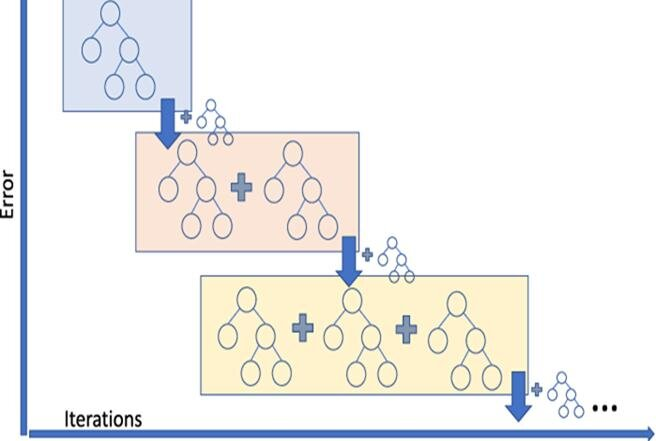

In [682]:
# Gradient Boost with parameter tuning

gboost = GradientBoostingRegressor(random_state=0)
score = []
nilai_mean = []
nilai_std = []

model_pipeline = Pipeline([
    ("preprocess", transformer_2),
    ("modeling", gboost)
])

param_grid = {
    'modeling__learning_rate': [0.01, 0.05, 0.1],
    'modeling__n_estimators': [100, 200, 300],
    'modeling__max_depth': [3, 4, 5, 6],
    'modeling__min_samples_split': [2, 5, 10],
    'modeling__min_samples_leaf': [1, 2, 4],
    'modeling__subsample': [0.8, 0.9, 1.0],
    'modeling__max_features': [None, 'sqrt']
}

kfold = KFold(n_splits=10)

gradient_tuned = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_iter=15,
    n_jobs=-1,
    verbose=2,
    error_score='raise' 
)

In [ ]:
# gradient_tuned.fit(X_train, y_train)

In [ ]:
# Print the best parameters and best score
print(f"Best parameters: {gradient_tuned.best_params_}")
print(f"Best RMSE: {gradient_tuned.best_score_}")

In [ ]:
# # Predicting with best parameters
# y_pred_tuned_gb =gradient_tuned.best_estimator_.predict(X_test)

# mse = mean_squared_error(y_test, y_pred_tuned_gb)
# rmse = np.sqrt(mse)
# percentage_errors = (y_test - y_pred_tuned_gb) / y_test
# rmspe = np.sqrt(np.mean(np.square(percentage_errors))) * 100
# R2 = r2_score(y_test, y_pred_tuned_gb)

# # Calculate Adjusted R-squared
# n = len(y_test)
# k = X_test.shape[1]
# adjusted_R2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

# print("\nMetrics Evaluation Gradient Boost After Tuning:")
# print(f"RMSE: {rmse}")
# print(f"RMSPE: {rmspe}")
# print(f"Adjusted R2: {adjusted_R2}")

| Parameter                  | Value   |
|----------------------------|---------|
| modeling__subsample        | 0.9     |
| modeling__n_estimators     | 100     |
| modeling__min_samples_split| 5       |
| modeling__min_samples_leaf | 2       |
| modeling__max_features     | None    |
| modeling__max_depth        | 4       |
| modeling__learning_rate    | 0.05    |


So we continue with the final model Gradient boost with these parameters.

---

**4.7 Final Model**

In [773]:
final_model_gb = GradientBoostingRegressor(random_state=0, subsample= 0.9, n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_features= None, max_depth= 4, learning_rate= 0.05)

gb_pipeline = Pipeline([
    ("preprocess", transformer_2),
    ("modeling", final_model_gb)
])

gb_pipeline.fit(X_train, y_train)
# predict
y_pred_final_gb = gb_pipeline.predict(X_test)

# Calculate metrics for the tuned model
mse = mean_squared_error(y_test, y_pred_final_gb)
rmse_tuned = np.sqrt(mse)
percentage_errors = (y_test - y_pred_final_gb) / y_test
rmspe_tuned = np.sqrt(np.mean(np.square(percentage_errors))) * 100
R2 = r2_score(y_test, y_pred_final_gb)

# Calculate Adjusted R-squared
n = len(y_test)
k = X_test.shape[1]
adjusted_R2_tuned = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Gradient Boost with Parameter tuning:")
print(f"RMSE: {rmse_tuned}")
print(f"RMSPE: {rmspe_tuned}")
print(f"Adjusted R2: {adjusted_R2_tuned}")


Metrics Evaluation Gradient Boost with Parameter tuning:
RMSE: 1688.0676895050156
RMSPE: 13.278599227404191
Adjusted R2: 0.832713441613883


| Model                        | RMSE Test Score | RMSPE Test Score |
|------------------------------|-----------------|------------------|
| Gradient Boosting (Baseline) | 1702.727507     | 14.179306        |
| Gradient Boosting (Tuned)    | 1688.067689     | 13.278599        |


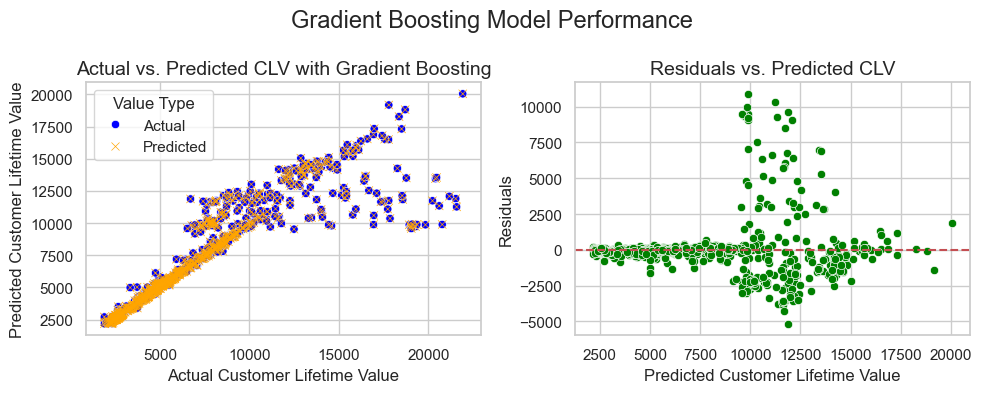

In [733]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Actual vs. Predicted CLV with color distinction
sns.scatterplot(x=y_test, y=y_pred_final_gb, hue=np.repeat(["Actual"], len(y_test)), ax=axs[0], palette=["blue"])  # Actual values are blue
sns.scatterplot(x=y_test, y=y_pred_final_gb, hue=np.repeat(["Predicted"], len(y_pred_final_gb)), ax=axs[0], palette=["orange"], marker="x")  # Predicted are orange 'x'

axs[0].set_xlabel("Actual Customer Lifetime Value", fontsize=12)
axs[0].set_ylabel("Predicted Customer Lifetime Value", fontsize=12)
axs[0].set_title("Actual vs. Predicted CLV with Gradient Boosting", fontsize=14)
axs[0].legend(title="Value Type")

# Plot 2: Residuals vs. Predicted CLV
sns.scatterplot(x=y_pred_final_gb, y=y_test - y_pred_final_gb, ax=axs[1], color="green")  # Residuals are green

axs[1].set_xlabel("Predicted Customer Lifetime Value", fontsize=12)
axs[1].set_ylabel("Residuals", fontsize=12)
axs[1].set_title("Residuals vs. Predicted CLV", fontsize=14)
axs[1].axhline(y=0, color='r', linestyle='dashed')  # Add a horizontal line at y=0

fig.suptitle("Gradient Boosting Model Performance", size=17)
fig.tight_layout()  # Adjust layout for better readability

plt.show()

#### **Left Plot (Actual vs. Predicted CLV)**:
The plot above provides a visual representation of the relationship between the actual CLV values and the CLV values predicted by the model.

**Positive Correlation**: The points on the plot generally form a cloud that follows a diagonal line, indicating a positive correlation. This means the model correctly identifies that customers with higher actual CLV tend to have higher predicted CLV as well.

**Clustering Around the Diagonal**: The closer the points are to the diagonal line, the better the model's predictions. The clustering observed in this plot, especially for mid-range CLV values, suggests a good degree of predictive accuracy.

**Spread at Higher Values**: The spread or dispersion of the points around the diagonal line increases as we move towards higher CLV values. This indicates that the model might have slightly more difficulty accurately predicting CLV for customers with very high values. It could be due to the inherent variability in high-value customers or the model's limitations in capturing the nuances of their behavior.

#### **Right Plot (Residuals vs. Predicted CLV):**

This plot focuses on the residuals, which are the differences between the actual and predicted CLV values. It helps assess the model's prediction errors.

**Ideal Scenario**: In an ideal scenario, the residuals should be randomly scattered around the horizontal line at zero. This would indicate that the model is unbiased, with no systematic over- or under-prediction across different CLV values.

**Heteroscedasticity**: The plot reveals a fanning-out pattern, where the spread of residuals increases as the predicted CLV increases. This is known as heteroscedasticity and implies that the model's predictions become less certain or more variable as the predicted CLV gets higher.

**Outliers**: The presence of a few points with large negative residuals (below the horizontal line) suggests that the model significantly underpredicted the CLV for those specific customers. These outliers warrant further investigation to understand their underlying causes and whether they represent a specific customer segment.

---

The analysis of our Gradient Boosting model reveals promising results for predicting Customer Lifetime Value (CLV), particularly for customers in the low to medium range. This is a crucial finding for our business, as it directly supports our strategic goal of focusing on customer retention.

As we know, acquiring new customers is significantly more expensive than retaining existing ones. By accurately identifying customers with low to medium CLV, we can proactively implement targeted retention strategies. These strategies could involve personalized offers, loyalty programs, or enhanced customer service, all aimed at increasing the lifetime value of these customers and maximizing their long-term profitability.

The model's ability to predict CLV is evident in the positive correlation between actual and predicted values, especially for the mid-range CLV segment. This means we can confidently rely on the model's predictions to identify customers who are at risk of churning or those who have the potential for increased spending.

While the model demonstrates some challenges with higher CLV values and exhibits slight heteroscedasticity, this does not detract from its value for our primary objective of customer retention. The insights gained from the model's predictions will enable us to make informed decisions and allocate resources efficiently to nurture and grow our existing customer base.

In [626]:
df_result = pd.DataFrame({
    "Actual CLV":round(y_test),
    "model prediction":[round(a) for a in y_pred_final_gb]
})
df_result.head(20)

,Actual CLV,model prediction
0,13743.0,13575
1,6006.0,6084
2,3618.0,3743
3,3370.0,3549
4,3424.0,3537
5,9942.0,11892
6,9101.0,9050
7,9114.0,8775
8,2575.0,2796
9,5174.0,5230


**4.9 Feature Importance**

In [692]:
# Getting feature names
features = list(transformer_2.get_feature_names_out())
list_features = []

for feature in features:
    list_features.append("_".join(feature.split("_")[2:]))

list_features

['employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'marital_status_Married',
 'marital_status_Single',
 'vehicle_class',
 'coverage',
 'renew_offer_type',
 'education',
 'number_of_policies',
 'monthly_premium_auto',
 'total_claim_amount',
 'income']

In [693]:
# assign feature importance
imp = gb_pipeline.named_steps['modeling'].feature_importances_

In [694]:
# to dataframe

feature_imp = pd.DataFrame({
    "Importance":imp,
    "Feature":list_features
}).sort_values(by="Importance", ascending=False)
feature_imp

,Importance,Feature
10,0.684934,number_of_policies
11,0.280775,monthly_premium_auto
12,0.012332,total_claim_amount
13,0.007653,income
6,0.005121,vehicle_class
1,0.003085,employmentstatus_Medical Leave
0,0.001574,employmentstatus_Employed
9,0.001398,education
8,0.000932,renew_offer_type
7,0.000800,coverage


Text(0.5, 1.0, 'Feature importance')

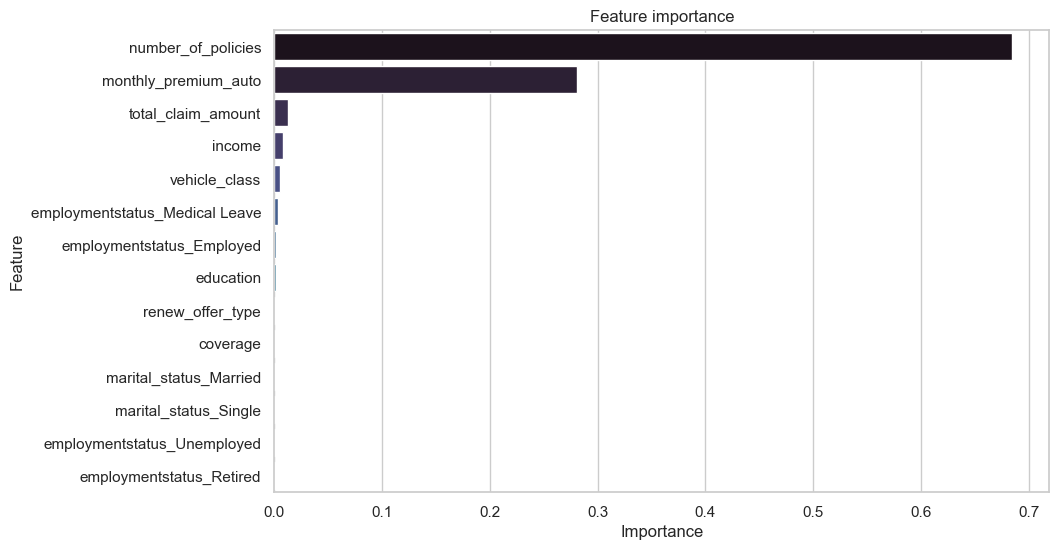

In [695]:
# Feature importance visualization

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=feature_imp, x="Importance", y="Feature", orient="h", palette="mako")
plt.title("Feature importance")


> ### 5. Saving the Gradient Boost Model

In [745]:
final_model = gb_pipeline
pickle.dump(final_model, open("model/gb_model_final.pkl", "wb"))

> ### 6. Explainable ML

In [620]:
final_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['employmentstatus',
                                                   'marital_status']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Two-Door '
                                                                              'Car',
                                                                              'Four-Door '
                                                                              'Car',
                                                                              'SUV',
                                                                              'Sports '
                                                                              'Car',
                                                                              'Luxury '
                                                                              'SUV',
                                                                              'Luxury '
                                                                              'Car'],
                                                                             ['Basic',
                                                                              'Extended',
                                                                              'Premium'],
                                                                             ['Offer1',
                                                                              'Offer2',
                                                                              'Offer3',
                                                                              'Offer4'],
                                                                             ['High '
                                                                              'School '
                                                                              'or '
                                                                              'Below',
                                                                              'College',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'Doctor']]),
                                                  ['vehicle_class', 'coverage',
                                                   'renew_offer_type',
                                                   'education'])])),
                ('modeling',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=5,
                                           n_estimators=300, random_state=0,
                                           subsample=0.9))])

In [621]:
import shap

# explainer

explainer = shap.Explainer(
    final_model[1].predict,
    final_model[0].transform(X_test)
)

shap_values = explainer(final_model[0].transform(X_test))

PermutationExplainer explainer: 961it [04:43,  3.27it/s]                         


----------------------------------------
Customer ID (Index): 9
Test Data: 
vehicle_class                  Four-Door Car
coverage                               Basic
renew_offer_type                      Offer1
employmentstatus                    Employed
marital_status                       Married
education               High School or Below
number_of_policies                       5.0
monthly_premium_auto                    64.0
total_claim_amount                 82.483947
income                               88081.0
Name: 9, dtype: object
Actual CLV: 5174.081063
----------------------------------------


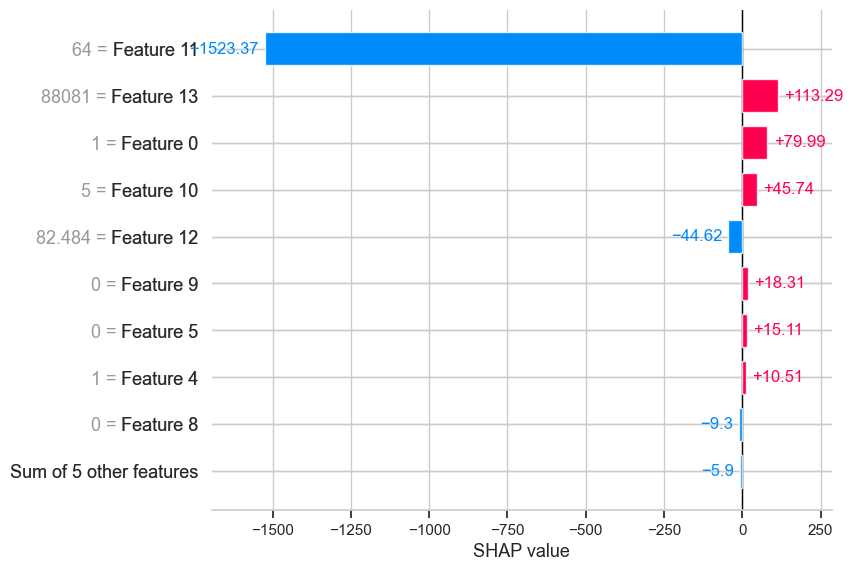

In [768]:
from IPython.display import display

def combined_shap_analysis(i, final_model, X_test, y_test, X_train, list_features):
    """
    Performs and displays SHAP analysis for a given customer ID (index).

    Args:
        i (int): Customer ID (index) to analyze.
        final_model: Fitted pipeline model.
        X_test (DataFrame): Test features.
        y_test (Series): Test target labels.
        X_train (DataFrame): Training features.
        list_features (list): List of feature names.

    Returns:
        None: Displays the analysis outputs.
    """
    
    # 1. Test Data and Prediction
    print("-" * 40)  # Separator for readability
    print(f"Customer ID (Index): {i}")
    print(f"Test Data: \n{X_test.iloc[i]}")
    print(f"Actual CLV: {y_test.iloc[i]}")
    print("-" * 40)  # Separator

    # 2. Bar Plot of SHAP Values (Training Data)
    X_train_trans = final_model[0].transform(X_train)
    X_train_preprocessed = pd.DataFrame(X_train_trans, columns=list_features)
    
    explainer = shap.Explainer(final_model.named_steps["modeling"], X_train_preprocessed)
    # shap_values = explainer(X_train_preprocessed)
    
    # Display bar plot for the specified customer index
    shap.plots.bar(shap_values[i])

    # 3. SHAP Force Plot (Test Data)
    X_test_trans = final_model[0].transform(X_test)
    X_test_preprocessed = pd.DataFrame(X_test_trans, columns=list_features)
    shap.initjs()
    explainer_test = shap.TreeExplainer(final_model.named_steps["modeling"])
    shap_values_test = explainer_test.shap_values(X_test_preprocessed)
    display(shap.force_plot(explainer_test.expected_value, shap_values_test[i], X_test_preprocessed.iloc[i]))

# Get user input for customer ID
i = input("Please enter a customer ID (index): ")  

# Ensure input is a valid index
try:
    i = int(i)
    if i < 0 or i >= len(X_test):
        raise ValueError
except ValueError:
    print("Invalid customer ID (index). Please enter a valid integer within the range of your dataset.")
else:
    # Perform combined analysis
    combined_shap_analysis(i, final_model, X_test, y_test, X_train, list_features)


> ### 7. Conclusion and Recommendation